In [24]:
from google.colab import files
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity (1).csv


In [106]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [107]:
garments_worker_productivity = pd.read_csv("garments_worker_productivity.csv")
garments_worker_productivity

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [108]:
garments_worker_productivity.drop(['date'],axis=1,inplace=True)
garments_worker_productivity.drop(['wip'],axis=1,inplace=True)
garments_worker_productivity

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [109]:
garments_worker_productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
 12  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 121.7+ KB


In [110]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(garments_worker_productivity['quarter'])
garments_worker_productivity['quarter'] = label_encoder.transform(garments_worker_productivity['quarter'])

label_encoder.fit(garments_worker_productivity['department'])
garments_worker_productivity['department'] = label_encoder.transform(garments_worker_productivity['department'])

label_encoder.fit(garments_worker_productivity['day'])
garments_worker_productivity['day'] = label_encoder.transform(garments_worker_productivity['day'])

garments_worker_productivity

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0,1,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,0,2,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0,2,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0,2,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,1,0,5,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,1,0,5,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,1,0,5,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [111]:
garments_worker_productivity.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [112]:
x = garments_worker_productivity[['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers']].values
y = garments_worker_productivity['actual_productivity'].values

In [114]:
features = pd.Series(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers'])
features

0                   quarter
1                department
2                       day
3                      team
4     targeted_productivity
5                       smv
6                 over_time
7                 incentive
8                 idle_time
9                  idle_men
10       no_of_style_change
11            no_of_workers
dtype: object

In [115]:
slr = LinearRegression()
slr.fit(x, y)

coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,0.003109,quarter
1,0.023754,department
2,0.000475,day
3,-0.009554,team
4,0.704739,targeted_productivity
5,-0.007354,smv
6,-0.000005,over_time
7,0.000057,incentive
8,0.000471,idle_time
9,-0.008701,idle_men


In [116]:
slr.intercept_

0.27401711343869317

In [117]:
import matplotlib.pyplot as plt
X = garments_worker_productivity[['no_of_workers']].values
y = garments_worker_productivity['actual_productivity'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [-0.00045584]
Intercept: 0.750867753438935


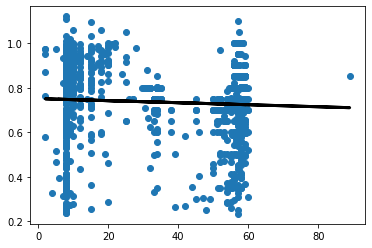

In [118]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='black', linewidth=3)


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 0.030
